In [13]:
from scipy.io.arff import loadarff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

In [14]:
raw_data = loadarff("CM1.arff")
data = pd.DataFrame(raw_data[0])
data["Defective"] = data["Defective"].apply(lambda x: x.decode())
data["Defective"] = data["Defective"].apply(lambda x: 1 if x == 'N' else 0)
data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,9.0,5.0,3.0,2.0,2.0,8.0,3.0,0.16,4.0,2.00,3.0,1.00,11.0,1.0,0.00,17.0,0.0,36.74,14.57,7799.92,0.18,102.0,0.07,433.33,535.29,0.33,2.0,4.0,10.0,0.10,36.0,66.0,21.0,17.0,31.0,19.05,19.0,1
1,19.0,3.0,1.0,2.0,0.0,4.0,2.0,0.06,2.0,2.00,2.0,1.00,23.0,1.0,0.00,33.0,0.0,64.01,11.65,8684.99,0.25,135.0,0.09,482.50,745.68,0.50,1.0,2.0,23.0,0.04,66.0,69.0,34.0,12.0,55.0,5.71,35.0,1
2,0.0,9.0,0.0,0.0,0.0,10.0,5.0,0.56,2.0,5.00,1.0,0.20,12.0,5.0,1.00,9.0,1.0,19.29,6.43,797.14,0.04,31.0,0.16,44.29,124.00,1.00,4.0,7.0,9.0,0.50,10.0,21.0,7.0,9.0,10.0,0.00,9.0,1
3,2.0,15.0,2.0,1.0,9.0,24.0,8.0,0.19,10.0,2.40,6.0,0.75,24.0,6.0,0.71,41.0,4.0,75.22,14.80,16481.41,0.37,187.0,0.07,915.63,1113.43,0.75,7.0,12.0,18.0,0.15,67.0,120.0,43.0,19.0,54.0,19.61,42.0,1
4,5.0,5.0,1.0,0.0,0.0,8.0,3.0,0.15,4.0,2.00,3.0,1.00,10.0,1.0,0.00,20.0,1.0,34.17,10.29,3620.93,0.12,71.0,0.10,201.16,351.75,0.33,2.0,4.0,9.0,0.12,25.0,46.0,17.0,14.0,26.0,0.00,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,8.0,7.0,0.0,2.0,14.0,10.0,4.0,0.24,4.0,2.50,1.0,0.25,11.0,3.0,0.67,15.0,0.0,17.03,14.68,3670.20,0.08,52.0,0.07,203.90,249.98,0.75,3.0,5.0,9.0,0.17,19.0,33.0,11.0,17.0,23.0,51.61,17.0,1
323,49.0,41.0,14.0,16.0,37.0,78.0,21.0,0.28,38.0,2.05,15.0,0.71,104.0,5.0,0.20,60.0,3.0,78.40,74.77,438244.07,1.95,821.0,0.01,24346.89,5861.57,0.24,20.0,39.0,85.0,0.13,319.0,502.0,96.0,45.0,163.0,46.90,76.0,1
324,17.0,21.0,7.0,0.0,8.0,36.0,11.0,0.20,16.0,2.25,8.0,0.73,53.0,5.0,0.40,55.0,4.0,48.89,26.83,35190.17,0.44,217.0,0.04,1955.01,1311.63,0.45,10.0,18.0,44.0,0.14,88.0,129.0,41.0,25.0,81.0,12.70,55.0,1
325,1.0,3.0,4.0,0.0,3.0,4.0,2.0,0.11,2.0,2.00,2.0,1.00,8.0,1.0,0.00,19.0,2.0,33.23,9.41,2943.55,0.10,62.0,0.11,163.53,312.75,0.50,1.0,2.0,8.0,0.08,20.0,42.0,17.0,16.0,24.0,13.64,19.0,1


[]

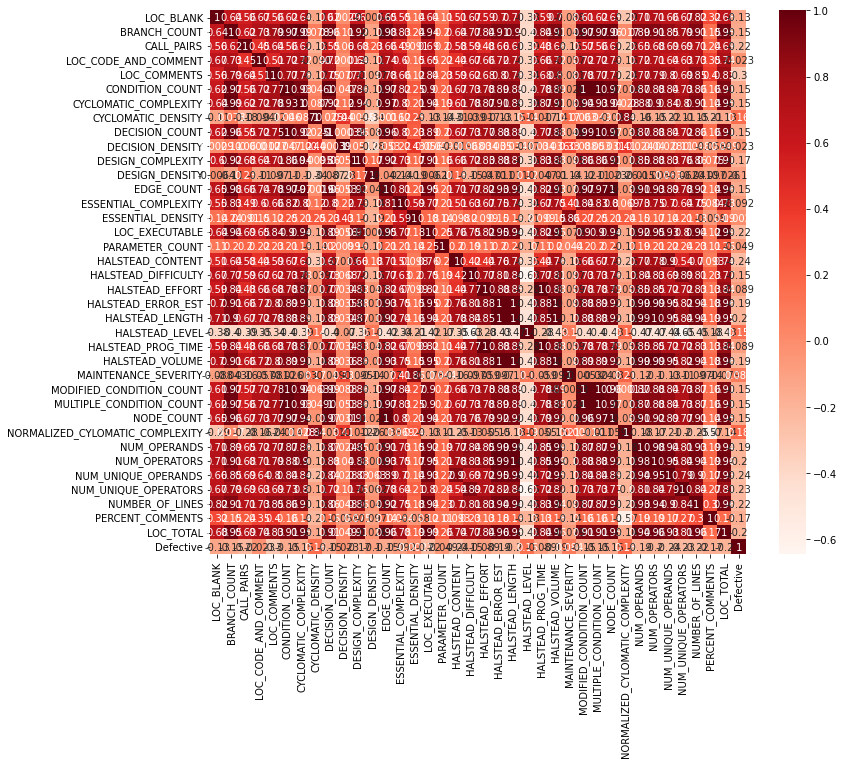

In [15]:
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds)
plt.plot()

##ESF


In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=89)
knn.fit(X_train, y_train)
accuracy=knn.score(X_test, y_test)
print("Accuracy ESf KNN:",accuracy)
y_pred=knn.predict(X_test)
print("MCC ESf KNN:",matthews_corrcoef(y_pred,y_test))
print()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy=gnb.score(X_test, y_test)
print("Accuracy ESf NB:",accuracy)
y_pred=gnb.predict(X_test)
print("MCC ESf NB:",matthews_corrcoef(y_pred,y_test))
print()

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
accuracy=dtc.score(X_test, y_test)
print("Accuracy ESf NB:",accuracy)
y_pred=dtc.predict(X_test)
print("MCC ESf DT:",matthews_corrcoef(y_pred,y_test))
print()

ab= AdaBoostClassifier()
ab.fit(X_train, y_train)
accuracy=ab.score(X_test, y_test)
print("Accuracy ESf AB:",accuracy)
y_pred=ab.predict(X_test)
print("MCC ESf AB:",matthews_corrcoef(y_pred,y_test))
print()

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy=rf.score(X_test, y_test)
print("Accuracy ESf RF:",accuracy)
y_pred=rf.predict(X_test)
print("MCC ESf RF:",matthews_corrcoef(y_pred,y_test))
print()

Accuracy ESf KNN: 0.898989898989899
MCC ESf KNN: 0.0

Accuracy ESf NB: 0.8585858585858586
MCC ESf NB: 0.39920473943590296

Accuracy ESf NB: 0.8686868686868687
MCC ESf DT: 0.16907213336198515

Accuracy ESf AB: 0.8282828282828283
MCC ESf AB: 0.0105999788000636

Accuracy ESf RF: 0.8787878787878788
MCC ESf RF: -0.048132024309816626



In [17]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop
data = data.drop(to_drop, axis=1)
data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_DENSITY,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_LEVEL,MAINTENANCE_SEVERITY,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,Defective
0,9.0,5.0,3.0,2.0,2.0,0.16,2.00,3.0,1.00,1.0,0.00,0.0,36.74,14.57,7799.92,0.07,0.33,0.10,21.0,17.0,31.0,19.05,1
1,19.0,3.0,1.0,2.0,0.0,0.06,2.00,2.0,1.00,1.0,0.00,0.0,64.01,11.65,8684.99,0.09,0.50,0.04,34.0,12.0,55.0,5.71,1
2,0.0,9.0,0.0,0.0,0.0,0.56,5.00,1.0,0.20,5.0,1.00,1.0,19.29,6.43,797.14,0.16,1.00,0.50,7.0,9.0,10.0,0.00,1
3,2.0,15.0,2.0,1.0,9.0,0.19,2.40,6.0,0.75,6.0,0.71,4.0,75.22,14.80,16481.41,0.07,0.75,0.15,43.0,19.0,54.0,19.61,1
4,5.0,5.0,1.0,0.0,0.0,0.15,2.00,3.0,1.00,1.0,0.00,1.0,34.17,10.29,3620.93,0.10,0.33,0.12,17.0,14.0,26.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,8.0,7.0,0.0,2.0,14.0,0.24,2.50,1.0,0.25,3.0,0.67,0.0,17.03,14.68,3670.20,0.07,0.75,0.17,11.0,17.0,23.0,51.61,1
323,49.0,41.0,14.0,16.0,37.0,0.28,2.05,15.0,0.71,5.0,0.20,3.0,78.40,74.77,438244.07,0.01,0.24,0.13,96.0,45.0,163.0,46.90,1
324,17.0,21.0,7.0,0.0,8.0,0.20,2.25,8.0,0.73,5.0,0.40,4.0,48.89,26.83,35190.17,0.04,0.45,0.14,41.0,25.0,81.0,12.70,1
325,1.0,3.0,4.0,0.0,3.0,0.11,2.00,2.0,1.00,1.0,0.00,2.0,33.23,9.41,2943.55,0.11,0.50,0.08,17.0,16.0,24.0,13.64,1


[]

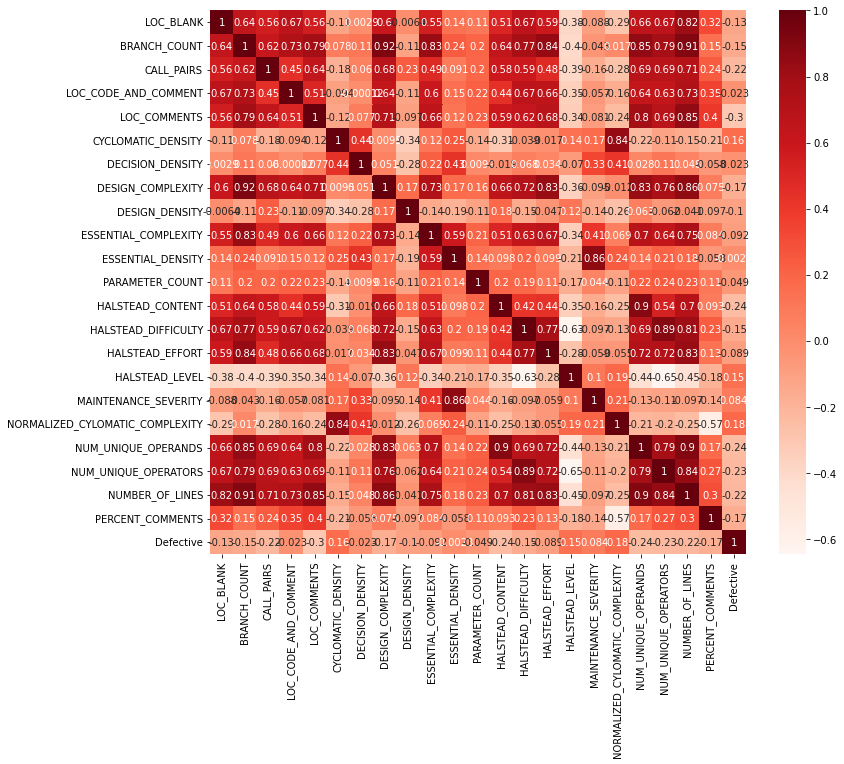

In [18]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds)
plt.plot()

##1.KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=89)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(knn)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
knn.fit(X_train_sfs, y_train)
accuracy=knn.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=knn.predict(X_test_sfs)
print("MCC HSf KNN:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.898989898989899
Selected columns: Index(['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CYCLOMATIC_DENSITY', 'DECISION_DENSITY',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'ESSENTIAL_COMPLEXITY',
       'ESSENTIAL_DENSITY'],
      dtype='object')
MCC HSf KNN: 0.0


##2.NAIVE BAYES

In [20]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(gnb)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
gnb.fit(X_train_sfs, y_train)
gnb.score(X_test_sfs, y_test)
accuracy=gnb.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
predict=knn.predict(X_test_sfs)
print("MCC:",matthews_corrcoef(y_test, predict))
y_pred=gnb.predict(X_test_sfs)
print("MCC HSf NB:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.8585858585858586
Selected columns: Index(['LOC_BLANK', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'CYCLOMATIC_DENSITY',
       'DESIGN_COMPLEXITY', 'ESSENTIAL_DENSITY', 'HALSTEAD_CONTENT',
       'MAINTENANCE_SEVERITY', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS',
       'PERCENT_COMMENTS'],
      dtype='object')
MCC: 0.0
MCC HSf NB: 0.14659572792330486


##3.DECISON TREE CLASSIFIER

In [21]:
dtc = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(dtc)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
dtc.fit(X_train_sfs, y_train)
accuracy=dtc.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=dtc.predict(X_test_sfs)
print("MCC HSf DT:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.8383838383838383
Selected columns: Index(['LOC_BLANK', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'DECISION_DENSITY', 'DESIGN_DENSITY', 'ESSENTIAL_COMPLEXITY',
       'ESSENTIAL_DENSITY', 'HALSTEAD_DIFFICULTY',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUMBER_OF_LINES'],
      dtype='object')
MCC HSf DT: 0.1101123595505618


##4.ADA BOOST

In [22]:
ab= AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(ab)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
ab.fit(X_train_sfs, y_train)
accuracy=ab.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=ab.predict(X_test_sfs)
print("MCC HSf AB:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.8181818181818182
Selected columns: Index(['CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'CYCLOMATIC_DENSITY',
       'DECISION_DENSITY', 'DESIGN_DENSITY', 'ESSENTIAL_COMPLEXITY',
       'ESSENTIAL_DENSITY', 'HALSTEAD_CONTENT', 'MAINTENANCE_SEVERITY',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_UNIQUE_OPERANDS'],
      dtype='object')
MCC HSf AB: -0.09938693418529143


##5.RANDOM FOREST

In [23]:
rf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(rf)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
rf.fit(X_train_sfs, y_train)
rf.score(X_test_sfs, y_test)
accuracy=rf.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=rf.predict(X_test_sfs)
print("MCC HSf RF:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.8686868686868687
Selected columns: Index(['BRANCH_COUNT', 'CALL_PAIRS', 'LOC_COMMENTS', 'DECISION_DENSITY',
       'DESIGN_DENSITY', 'ESSENTIAL_DENSITY', 'HALSTEAD_DIFFICULTY',
       'MAINTENANCE_SEVERITY', 'NORMALIZED_CYLOMATIC_COMPLEXITY',
       'NUM_UNIQUE_OPERANDS', 'PERCENT_COMMENTS'],
      dtype='object')
MCC HSf RF: -0.05925568289249715
